In [10]:
#QUESTION D
import pandas as pd
file_path = 'C:\\Users\\atang\\OneDrive\\Documents\\Data Science MSc\\Programming for data science\\cleaned_who_suicide_statistics_modified.csv'
Dataset = pd.read_csv(file_path)

#Add a new column “suicides/100k” and generate its data
#suicides/100k population of a country is the population of a specific age group and gender within that country
#divided by 100000, and the number of suicides divided by that number.

Dataset['suicides/100k'] = Dataset['suicides_no']/(Dataset['population']/100000)

#check if the new column has been applied before proceeding
print(Dataset.head())

   country  year     sex          age  suicides_no  population  HDI for year  \
0  Albania  1987    male  15-24 years         21.0      312900         0.779   
1  Albania  1987    male  35-54 years         16.0      308000         0.779   
2  Albania  1987  female  15-24 years         14.0      289700         0.779   
3  Albania  1987    male    75+ years          1.0       21800         0.779   
4  Albania  1987    male  25-34 years          9.0      274300         0.779   

   gdp_for_year ($)  suicides/100k  
0        2156624900       6.711409  
1        2156624900       5.194805  
2        2156624900       4.832585  
3        2156624900       4.587156  
4        2156624900       3.281079  


In [11]:
#QUESTION E
#Function to determine the generation based on birth year
def determine_generation(year, age_group):
    try:
        # Extract the lower bound of the age group
        if '+' in age_group:  # Handling age groups like '75+ years'
            lower_bound_age = int(age_group.split('+')[0])
        else:
            lower_bound_age = int(age_group.split('-')[0])

        birth_year = year - lower_bound_age

        # Determine the generation
        if 1883 <= birth_year <= 1900:
            return 'Lost Generation'
        elif 1901 <= birth_year <= 1927:
            return 'G.I. Generation'
        elif 1928 <= birth_year <= 1945:
            return 'Silent'
        elif 1946 <= birth_year <= 1964:
            return 'Boomers'
        elif 1965 <= birth_year <= 1980:
            return 'Generation X'
        elif 1981 <= birth_year <= 1995:
            return 'Millennials'
        elif 1996 <= birth_year <= 2010:
            return 'Generation Z'
        elif 2011 <= birth_year <= 2025:
            return 'Generation A'
        else:
            return 'Unknown'
    except ValueError:
        # In case of any unexpected value
        return 'Unknown'

#Applying the function to add the 'generation' column
Dataset['generation'] = Dataset.apply(lambda x: determine_generation(x['year'], x['age']), axis=1)

#Check output of the code by displaying the updated dataframe with the new column
print(Dataset.head())


   country  year     sex          age  suicides_no  population  HDI for year  \
0  Albania  1987    male  15-24 years         21.0      312900         0.779   
1  Albania  1987    male  35-54 years         16.0      308000         0.779   
2  Albania  1987  female  15-24 years         14.0      289700         0.779   
3  Albania  1987    male    75+ years          1.0       21800         0.779   
4  Albania  1987    male  25-34 years          9.0      274300         0.779   

   gdp_for_year ($)  suicides/100k       generation  
0        2156624900       6.711409     Generation X  
1        2156624900       5.194805          Boomers  
2        2156624900       4.832585     Generation X  
3        2156624900       4.587156  G.I. Generation  
4        2156624900       3.281079          Boomers  


In [13]:
#QUESTION F
#Add a new column “gdp_per_capita” and fill its data. GDP per Capita of a country is GDP divided by
#population of that country.
Dataset['gdp_per_capita'] = Dataset['gdp_for_year ($)'] / Dataset['population']

#Check output of the code by displaying the updated dataframe with the new column
print(Dataset.head())


   country  year     sex          age  suicides_no  population  HDI for year  \
0  Albania  1987    male  15-24 years         21.0      312900         0.779   
1  Albania  1987    male  35-54 years         16.0      308000         0.779   
2  Albania  1987  female  15-24 years         14.0      289700         0.779   
3  Albania  1987    male    75+ years          1.0       21800         0.779   
4  Albania  1987    male  25-34 years          9.0      274300         0.779   

   gdp_for_year ($)  suicides/100k       generation  gdp_per_capita  
0        2156624900       6.711409     Generation X     6892.377437  
1        2156624900       5.194805          Boomers     7002.028896  
2        2156624900       4.832585     Generation X     7444.338626  
3        2156624900       4.587156  G.I. Generation    98927.747706  
4        2156624900       3.281079          Boomers     7862.285454  


In [14]:
#QUESTION G
#Group by country and sum the suicides
total_suicides_by_country = Dataset.groupby('country')['suicides_no'].sum()
#Sort the countries by total suicides in descending order
ranked_countries_by_suicides = total_suicides_by_country.sort_values(ascending=False)

#Set option to display all rows (or a specific large number)
pd.set_option('display.max_rows', None)

#Display the ranked countries
print(ranked_countries_by_suicides)

country
Russian Federation              815965.0
United States                   759837.0
Japan                           635785.0
France                          240432.0
Ukraine                         237879.0
Germany                         215158.0
Republic of Korea               186886.0
Brazil                          174197.0
United Kingdom                  116435.0
Poland                          103503.0
Thailand                         99369.0
Italy                            99023.0
Mexico                           86587.0
Kazakhstan                       85850.0
Canada                           82757.0
Spain                            82332.0
Argentina                        66667.0
Hungary                          62092.0
Australia                        60226.0
Romania                          56417.0
Belgium                          55665.0
Belarus                          47868.0
Sri Lanka                        43068.0
Colombia                         42329.0
Netherla

In [15]:
#QUESTION H
#Write a function that will allow the user to input the country they wish to know the year with the highest number of suicides
#a function avoids having to write a full code for every country 
def year_with_highest_suicides(country_name):
    country_data = Dataset[Dataset['country'] == country_name] #assign the country_data to the country_name inputted and filter the Dataset for th given country
    suicides_by_year = country_data.groupby('year')['suicides_no'].sum() #Group the data and calculate the sum of suicides per year
    max_suicides_year = suicides_by_year.idxmax() # assign a variable for the max year 
    return max_suicides_year

#test the function
country_name = 'United States' #store the desire country_name
max_year = year_with_highest_suicides(country_name)
print(f'The year with the highest number of suicides in {country_name} was {max_year}')

# country_name = 'United States'  # Replace with the desired country name
# year_of_max_suicides = year_with_highest_suicides(country_name)
# print(f"The year with the highest number of suicides in {country_name} was {year_of_max_suicides}")

The year with the highest number of suicides in United States was 2011


In [31]:
#QUESTION I
#create a function to calculate the number of suicides by gender for a given year and country
#a function allows the user to input any country of their choice that is found within the dataset
def suicides_by_gender_in_year(country_name, year):
    specific_year_data = Dataset[(Dataset['country'] == country_name) & (Dataset['year'] == year)]
    suicides_by_gender = specific_year_data.groupby('sex')['suicides_no'].sum()
    return suicides_by_gender

#test the function
country_name = 'Albania'  #store the desired country name
year = 2000  #store the desired year
suicides_by_gender = suicides_by_gender_in_year(country_name, year)
print(f"Number of suicides by gender in {country_name} in {year}:")

#display the data
print(suicides_by_gender)

Number of suicides by gender in Albania in 2000:
sex
female    74.0
male      29.0
Name: suicides_no, dtype: float64


In [17]:
#QUESTION J
#refer back to the list of countries in question a and create a dictionary allocating all countries to a continent
#Example partial country to continent mapping
country_to_continent = {
    'Albania': 'Europe',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bosnia and Herzegovina': 'Europe',
    'Brazil': 'South America',
    'Bulgaria': 'Europe',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Asia',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Dominica': 'North America',
    'Ecuador': 'South America',
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Guyana': 'South America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kiribati': 'Oceania',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Latvia': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macau': 'Asia',
    'Maldives': 'Asia',
    'Malta': 'Europe',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto Rico': 'North America',
    'Qatar': 'Asia',
    'Republic of Korea': 'Asia',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and Grenadines': 'North America',
    'San Marino': 'Europe',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Suriname': 'South America',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Thailand': 'Asia',
    'Trinidad and Tobago': 'North America',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia'
}


#Write a function to map the countries in the dataset to continents
Dataset['continent'] = Dataset['country'].apply(lambda x: country_to_continent.get(x, 'Unknown'))

# Group by continent and sum the suicides
total_suicides_by_continent = Dataset.groupby('continent')['suicides_no'].sum()

# Display the total suicides by continent to check if the above code has been applied
print(total_suicides_by_continent)

continent
Africa             16437.0
Asia             1175871.0
Europe           2561746.0
North America    1066458.0
Oceania            76084.0
South America     356522.0
Name: suicides_no, dtype: float64


In [18]:
#QUESTION K
#Select the columns of interest for correlation to make sure only columns we want to check will be displayed
data_of_interest = Dataset[['suicides_no', 'gdp_per_capita', 'population']]

#Calculate the correlation matrix
correlation_matrix = data_of_interest.corr()

#Display the correlation matrix
print(correlation_matrix)

#Explain correlation coefficient
#suicides_no and gdp_per_capita: The correlation coefficient is approximately -0.011, suggesting a very weak negative correlation. This means that as GDP per capita increases, there is a very slight tendency for the number of suicides to decrease, but this relationship is so weak that it might not be significant.

#suicides_no and population: The correlation coefficient is approximately 0.544, suggesting a moderate positive correlation. This indicates that as the population increases, the number of suicides tends to increase as well. This makes intuitive sense since a larger population would naturally have a higher number of events occurring, including suicides.

#gdp_per_capita and population: The correlation coefficient is approximately -0.032, which indicates a very weak negative correlation. This suggests that there is a very slight tendency for GDP per capita to decrease as the population increases, but again, this relationship is so weak that it may not be meaningful.

#It's important to remember that correlation does not imply causation. These correlations do not necessarily mean that one variable causes the other to change. They only describe the relationship between the variables in terms of their movement together.

                suicides_no  gdp_per_capita  population
suicides_no        1.000000       -0.011491    0.544214
gdp_per_capita    -0.011491        1.000000   -0.032061
population         0.544214       -0.032061    1.000000


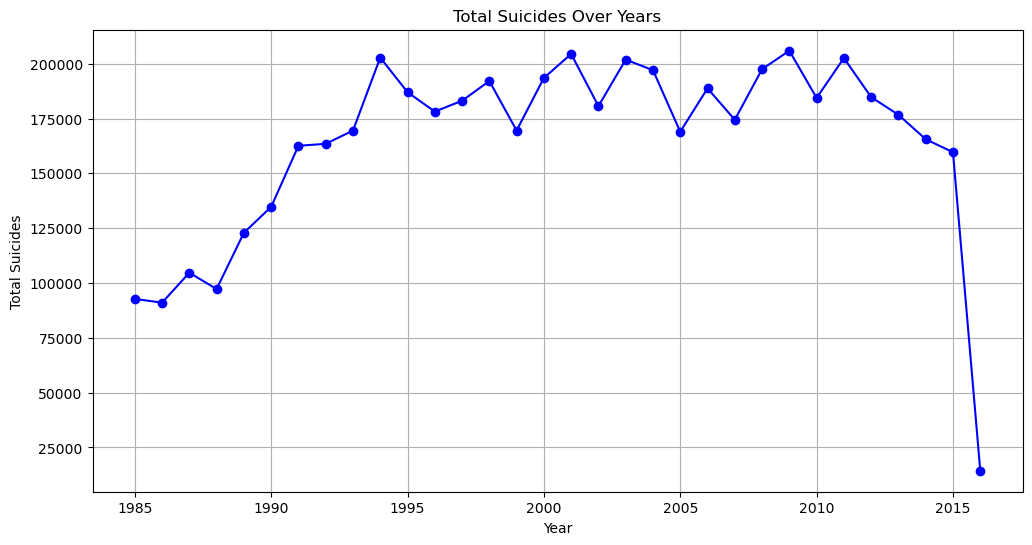

In [21]:
#QUESTION L
#import the library required for visualisation
import matplotlib.pyplot as plt

#Group data by year and sum the suicides to make it easier for plotting
suicides_by_year = Dataset.groupby('year')['suicides_no'].sum()

#Plot a graph of total suicides per year to identify correlation/patterns
plt.figure(figsize=(12, 6))
plt.plot(suicides_by_year.index, suicides_by_year.values, marker='o', linestyle='-', color='b') #set the dolour/design of the graph
plt.title('Total Suicides Over Years') #set the title of the graph
plt.xlabel('Year') #set the x-axis
plt.ylabel('Total Suicides') #set the y-axis
plt.grid(True)
plt.show() #display the graph

#Explain the findings
#1.0 Increasing Trend Until Mid-1990s: There seems to be a generally increasing trend in the total number of suicides from 1985 until the mid-1990s.

#2.0 Plateau: After the mid-1990s, the trend plateaus with some fluctuations but the number of suicides appears to remain relatively constant. This could suggest that whatever factors were causing the increase either plateaued or were countered by other factors that led to a stabilization in the number of suicides.

#3.0 Sharp Decline in 2015: There is a very sharp decline in the number of suicides in 2015. This is an unusual observation and could be due to a variety of factors:
#Data Error or Incompleteness: It might indicate a reporting error or a change in the way data was collected or reported.
#Significant Event or Intervention: There could have been a significant event or a successful intervention that led to a drastic reduction in the number of suicides.
#Population Changes: Demographic shifts or changes in the population structure such as pandemics could also affect the number of suicides, but such a dramatic change in a single year suggests other factors.


#4.0 Absence of Data Beyond 2015: There is no data beyond the year 2015, which could mean that the dataset is incomplete or that this was the last year of available data when the graph was created.


<Figure size 1200x600 with 0 Axes>

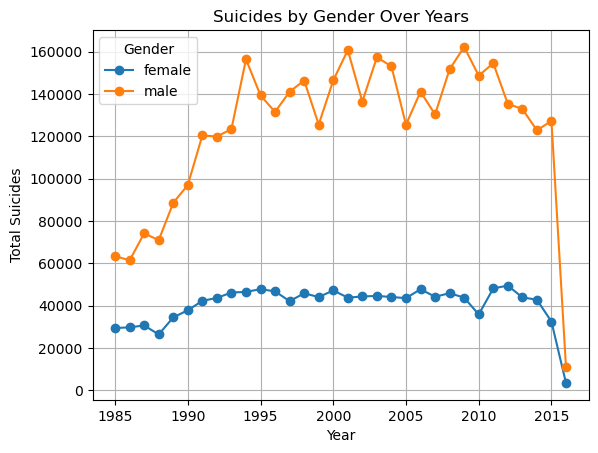

In [22]:
#QUESTION M
#Group data by year and gender, then sum the suicides
suicides_by_year_gender = Dataset.groupby(['year', 'sex'])['suicides_no'].sum().unstack()

#Plot the graph as done in question L
plt.figure(figsize=(12, 6))
suicides_by_year_gender.plot(kind='line', marker='o')
plt.title('Suicides by Gender Over Years')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.grid(True)
plt.legend(title='Gender') #set the key of the graph for gender for better visualisation and analysis
plt.show()

#Explain findings
#Gender Disparity: There's a significant and consistent gender disparity in the number of suicides, with the number for males being substantially higher than that for females throughout the entire period. This is in line with global suicide data which often shows higher suicide rates among men compared to women.

#Trend Over Time: For both genders, the trend initially increases up to the mid-1990s. After this point, the number of suicides among males shows some fluctuation but generally maintains a level without dramatic increases or decreases until the sharp drop in 2015. For females, the number remains relatively more stable over the years with less fluctuation than for males.

#Sharp Decline in 2015: Similar to the previous graph, there is a sharp decline in the reported number of suicides for both genders in 2015. This drastic change is unusual and could be due to several reasons, such as changes in data reporting, methodological changes in how data was collected, or actual changes in the suicide rates due to unknown factors.

#Relative Stability Among Females: The number of suicides among females remains relatively stable compared to males, which could suggest that the factors affecting suicide rates in females have been more constant over time, or that the variance in male suicide rates is due to factors that disproportionately affect men.

#Consistent Gender Gap: Throughout the years, the gap between male and female suicides has remained consistent, suggesting that the factors contributing to this gap have been persistent over time.


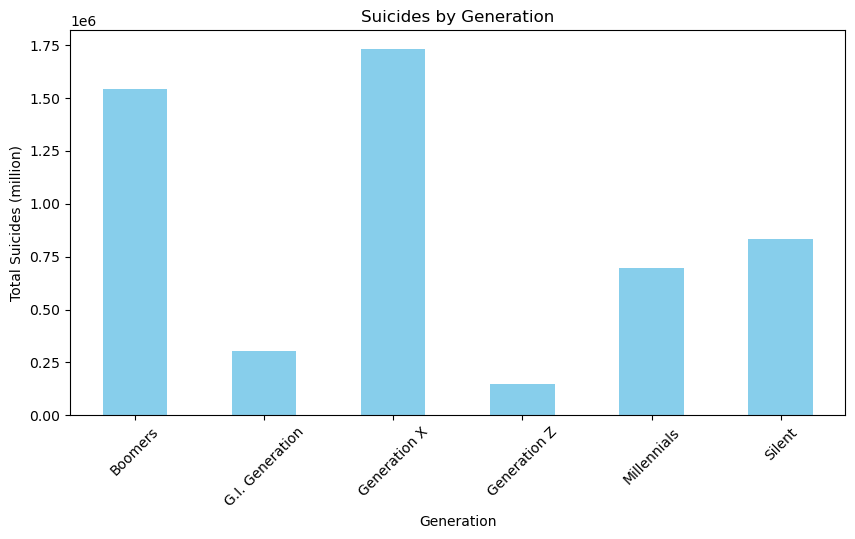

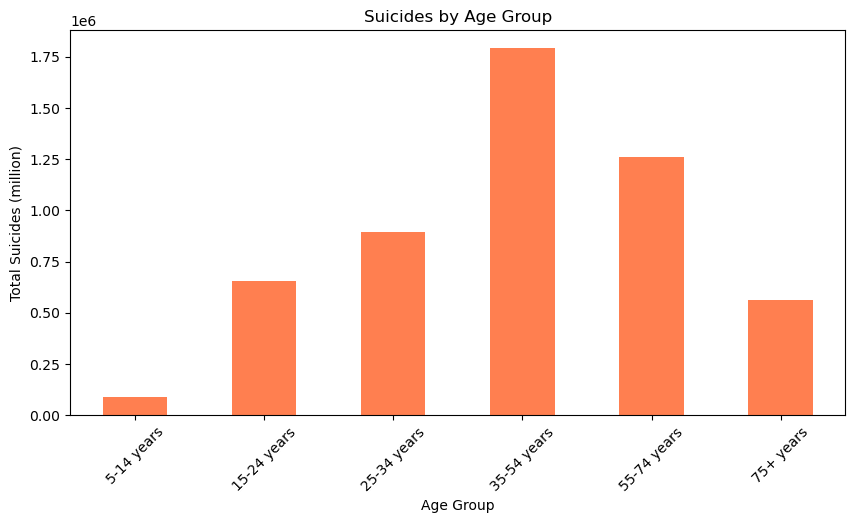

In [23]:
#QUESTION N
#check for any negative values to make sure there are no errors in the subsequent results/code
# negative_values = Dataset[Dataset['suicides_no'] < 0]
# print(f"Negative values in 'suicides_no':\n{negative_values}")

#Calculate total suicides by generation
suicides_by_generation = Dataset.groupby('generation')['suicides_no'].sum()

#set the order of the age group for the plot
age_group_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

#Calculate total suicides by age group
suicides_by_age_group = Dataset.groupby('age')['suicides_no'].sum().reindex(age_group_order)

#Plot suicides by generation
plt.figure(figsize=(10, 5))
suicides_by_generation.plot(kind='bar', color='skyblue')
plt.title('Suicides by Generation')
plt.xlabel('Generation')
plt.ylabel('Total Suicides (million)')
plt.xticks(rotation=45) #rotate the labels of x-axis to improve readability
plt.show()

# Plot suicides by age group
plt.figure(figsize=(10, 5))
suicides_by_age_group.plot(kind='bar', color='coral')
plt.title('Suicides by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Suicides (million)')
plt.xticks(rotation=45)  #rotate the labels of x-axis to improve readability
plt.show()

#Explain findings for suicides by Generation
#Boomers: This group has the highest total number of suicides among the generations listed. Baby boomers are typically defined as individuals born from 1946 to 1964. Given their age, they have had a longer time frame to accumulate these numbers compared to subsequent generations.

#G.I. Generation: This group has the lowest total number of suicides. The G.I. Generation refers to individuals born from around 1901 to 1927. The low number could be due to the smaller population size, as many individuals from this generation would have naturally deceased due to age, reducing the sample size.

#Generation X: This generation shows a significant number of suicides, less than the Boomers but more than Millennials and the Silent Generation. Generation X typically includes individuals born from 1965 to 1980.

#Generation Z: The number of suicides in Generation Z is the second lowest on the graph, which might be attributable to their young age (born from 1996 to 2010). They have not lived through the risk period for the highest rates of suicide, which typically occurs in mid-life.

#Millennials: This group has a moderate number of suicides, which is higher than Generation Z and the G.I. Generation but lower than Generation X and the Silent Generation. Millennials are typically those born from 1981 to 1995.

#Silent Generation: The Silent Generation, born from 1928 to 1945, shows a total number of suicides that is higher than the G.I. Generation and Generation Z but lower than the other groups.



#Explain findings for suicides by Generation
#35-54 Age Group: This age group has the highest total number of suicides, which could suggest that middle-aged individuals are at a higher risk. This might reflect various stressors/factors such as economic pressures, family responsibilities, and health issues that can become more prevalent during these years.

#Youngest Age Group (5-14 years): This group has the lowest total number of suicides. While any number is concerning, the lower total in this age group may reflect the relative rarity of suicide among very young individuals.

#Adolescents and Young Adults (15-24 years): The total number of suicides in this age group is higher than the youngest group but lower than the older age groups. Suicide is a leading cause of death among adolescents and young adults, and the data presented confirms that it is a significant issue within this demographic.

#Older Adults (55-74 years): The total number of suicides in this age group is significant but less than the 35-54 age group. This could be due to various factors, including retirement, loss of loved ones, isolation, and health issues that can affect individuals in this age group.

#Elderly (75+ years): The number of suicides in the oldest age group presented is lower than the middle-aged group but still considerable. Older adults may face challenges such as bereavement, physical illness, and feelings of purposelessness, which can contribute to suicide risk.

#Overall Trend: The trend seems to increase with age up to the 35-54 group and then decrease as age increases. This might indicate that the risk of suicide is particularly high in the middle-aged group and diminishes somewhat in the later years.
#the bar chart is also positively skewed to the right 